
# Machine Learning I: Introduction to Machine Learning

### Darvin Yi (darvinyi[at]Stanford.EDU)

# Machine Learning Unit Overview

- 2017/04/24: *This lecture* Intro to Machine Learning
- 2017/04/26: Evaluation of Machine Learning
- 2017/05/01: Vanilla Neural Networks
- 2017/05/03: Convolutional Neural Networks
- 2017/05/08: Current Topics in DL for Medical Images I
- 2017/05/11: Current Topics in DL for Medical Images II

# Machine Learning as Transformation

- some input $\mathbf{X}$
 - class ($C \in \{c_1, c_2, \dots \}$)
 - scalar ($x \in \mathbb{R}$)
 - vector ($\mathbf{x} \in \mathbb{R}^p$)
 - ($\mathbf{I} \in \mathbb{R}^{m\times n}$)
- some output $\mathbf{Y}$
 - class ($C \in \{c_1, c_2, \dots \}$)
 - scalar ($x \in \mathbb{R}$)
 - vector ($\mathbf{x} \in \mathbb{R}^p$)
 - ($\mathbf{I} \in \mathbb{R}^{m\times n}$)

Maching Learning as a study of $\mathbf{X} \mapsto \mathbf{y}$

# Simple Linear Regression

| Chirps/Sec | Temperature (F) |
| ---------- | --------------- |
| 20         | 88.6            |
| 16         | 71.6            |
| 19.8       | 93.3            |
| 18.4       | 84.3            |
| 17.1       | 80.6            |
| 15.5       | 75.2            |
| 14.7       | 69.7            |
| 17.1       | 82              |
| 15.4       | 69.4            |
| 16.2       | 83.3            |
| 15         | 79.6            |
| 17.2       | 82.6            |
| 16         | 80.1            |
| 17         | 83.5            |
| 14.4       | 76.3            |

Temperature w.r.t. cricket chirps rate. [Pierce, George Washington. "songs of insects." (1948).](http://agris.fao.org/agris-search/search.do?recordID=US201300661024)

# Simple Linear Regression

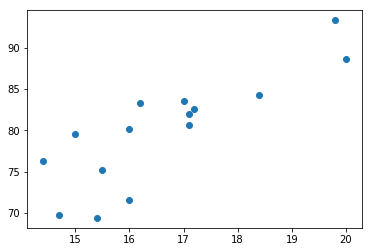

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.array([20, 16, 19.8, 18.4, 17.1, 15.5, 14.7, 17.1, 15.4, 16.2, 15, 17.2, 16, 17, 14.4])
Y = np.array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 82, 69.4, 83.3, 79.6, 82.6, 80.1, 83.5, 76.3])

f = plt.figure()
ax = f.add_subplot(111)
ax.scatter(X, Y)

# Simple Linear Regression

Model: $\mathbf{Y}^{(i)} = f(\mathbf{X}) = \beta_0 + \mathbf{X}^{(i)} \beta_1$

Difference: $\Delta = \mathbf{Y}^{(i)} - \beta_0 - \mathbf{X}^{(i)} \beta_1$

Cost: $\mathcal{L} = \sum_{i=0}^n (\mathbf{Y}^{(i)} - \beta_0 - \mathbf{X}^{(i)} \beta_1)^2$

Finding Local Minima:
$$ 0 = \frac{\partial \mathcal{L}}{\partial \beta_1} = - 2 \sum_{i=0}^n (\mathbf{Y}^{(i)} - \beta_0 - \mathbf{X}^{(i)} \beta_1) \mathbf{X}^{(i)} $$
$$ \beta_1 = \frac{\sum_{i=0}^n (\mathbf{Y}^{(i)} - \beta_0) \mathbf{X}^{(i)}}{\sum_{i=0}^n (\mathbf{X}^{(i)})^2} $$
$$ 0 = \frac{\partial \mathcal{L}}{\partial \beta_0} = - 2 \sum_{i=0}^n (\mathbf{Y}^{(i)} - \beta_0 - \mathbf{X}^{(i)} \beta_1) $$
$$ \beta_0 = \frac{1}{n} \sum_{i=0}^n (\mathbf{Y}^{(i)} - \mathbf{X}^{(i)} \beta_1) $$
$$ \beta_0 = E \left[ \mathbf{Y} - \mathbf{X} \beta_1 \right] \,\, , \,\, \beta_1 = \frac{ \sum_{i=0}^n \mathbf{Y}^{(i)} \mathbf{X}^{(i)} - \frac1n \sum_{i=0}^n \mathbf{Y}^{(i)} \sum_{i=0}^n \mathbf{X}^{(i)}}{\sum_{i=0}^n (\mathbf{X}^{(i)})^2 - \frac1n \left( \sum_{i=0}^n \mathbf{X}^{(i)}\right)^2} = \frac{\text{Cov}[\mathbf{X}, \mathbf{Y}]}{\text{Var}[\mathbf{X}]}$$

# Simple Linear Regression
### Understanding Co-variance

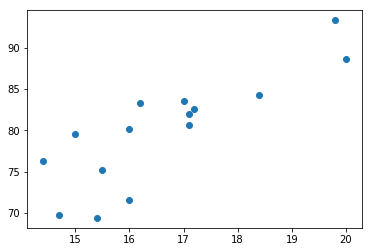

In [4]:
import matplotlib.patches as patches

f,ax = plt.subplots(1,1)
ax.scatter(X, Y)

# Simple Linear Regression
### Understanding Co-variance

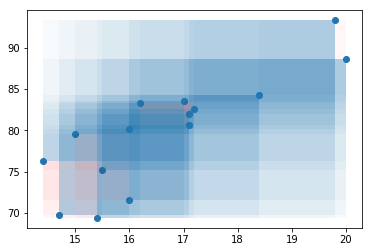

In [6]:
import matplotlib.patches as patches

def plot_covariance(ax, X, Y):
    for i in range(len(X)-1):
        for j in range(i+1, len(X)):
            if (X[j]-X[i])*(Y[j]-Y[i]) < 0:
                ax.add_patch(patches.Rectangle((X[i], Y[i]), X[j]-X[i], Y[j]-Y[i], facecolor="red", alpha=0.03))
            else:
                ax.add_patch(patches.Rectangle((X[i], Y[i]), X[j]-X[i], Y[j]-Y[i], alpha=0.03))
                
f,ax = plt.subplots(1,1)
ax.scatter(X, Y)
plot_covariance(ax, X, Y)

Covariance: How much "Blue" is in the image.

# Simple Linear Regression
### Understanding Co-variance

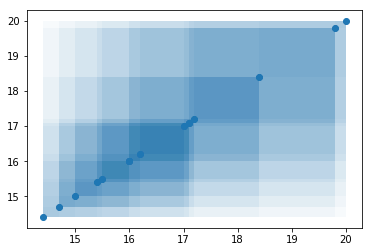

In [7]:
f,ax = plt.subplots(1,1)
ax.scatter(X, X)
plot_covariance(ax, X, X)

Normalize by the variance of $\mathbf{X}$.

# Simple Linear Regression

0

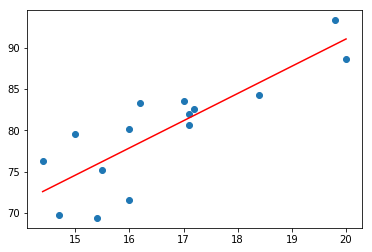

In [8]:
def plot_linear_regression(ax, X, Y, xmin=0, xmax=1):
    beta1 = Y.dot(X) - np.sum(Y) * np.mean(X)
    beta1 /= X.dot(X) - np.sum(X) * np.mean(X)
    beta0 = np.mean(Y) - beta1 * np.mean(X)
    x_plt = np.array([xmin, xmax])
    y_plt = beta0 + beta1 * x_plt
    ax.plot(x_plt, y_plt, 'r')
    return 0

f,ax = plt.subplots(1,1)
ax.scatter(X, Y)
plot_linear_regression(ax, X, Y, np.min(X), np.max(X))

# Multivariate Linear Regression

Model: $\mathbf{Y}^{(i)} = f(\mathbf{X}) = \beta_0 + \sum_{j=0}^{p} \mathbf{X}^{(i)} \beta_j$
$$f: \mathbb{R}^{p} \stackrel{\beta, \beta_0}{\to} \mathbb{R} \,\, | \,\, \mathbf{Y}^{(n \times 1)} = \beta_0 \mathbf{1}^{(n \times 1)} + \mathbf{X}^{(n \times p)} \beta^{(p \times 1)}$$

Difference: $\Delta = \mathbf{Y}^{(i)} - \beta_0 - \mathbf{X}^{(i)} \beta_1$

Cost: $\mathcal{L} = \sum_{i=0}^n (\mathbf{Y}^{(i)} - \beta_0 - \mathbf{X}^{(i)} \beta_1)^2$

Finding Local Minima: 
$$ 0 = \frac{\partial \mathcal{L}}{\partial \beta_1} = - 2 \sum_{i=0}^n (\mathbf{Y}^{(i)} - \beta_0 - \mathbf{X}^{(i)} \beta_1) \mathbf{X}^{(i)} $$
$$ \beta_1 = \frac{\sum_{i=0}^n (\mathbf{Y}^{(i)} - \beta_0) \mathbf{X}^{(i)}}{\sum_{i=0}^n (\mathbf{X}^{(i)})^2} $$
$$ 0 = \frac{\partial \mathcal{L}}{\partial \beta_0} = - 2 \sum_{i=0}^n (\mathbf{Y}^{(i)} - \beta_0 - \mathbf{X}^{(i)} \beta_1) $$
$$ \beta_0 = \frac{1}{n} \sum_{i=0}^n (\mathbf{Y}^{(i)} - \mathbf{X}^{(i)} \beta_1) $$
$$ \beta_0 = E \left[ \mathbf{Y} - \mathbf{X} \beta_1 \right] \,\, , \,\, \beta_1 = \frac{ \sum_{i=0}^n \mathbf{Y}^{(i)} \mathbf{X}^{(i)} - \frac1n \sum_{i=0}^n \mathbf{Y}^{(i)} \sum_{i=0}^n \mathbf{X}^{(i)}}{\sum_{i=0}^n (\mathbf{X}^{(i)})^2 - \frac1n \left( \sum_{i=0}^n \mathbf{X}^{(i)}\right)^2} = \frac{\text{Cov}[\mathbf{X}, \mathbf{Y}]}{\text{Var}[\mathbf{X}]}$$